#                   Introduccion

Este proyecto analiza un conjunto de datos de seguros médicos con el objetivo de identificar los factores que influyen en el costo del seguro, considerando variables demográficas y de estilo de vida.


--------------------------------------------------------------

## Preguntas del análisis

Este análisis busca responder las siguientes preguntas:

1. ¿Qué factores están asociados a mayores costos del seguro médico?
2. ¿Cómo difieren los cargos médicos entre fumadores y no fumadores?
3. ¿Existe una relación entre la edad del asegurado y el costo del seguro?
4. ¿Cómo influye el índice de masa corporal (BMI) en los cargos médicos?
5. ¿Existen interacciones entre hábitos de vida y variables demográficas que amplifiquen los costos?


----------------------------------------

# Análisis Exploratorio Inicial  
### Dataset: Insurance

Este notebook corresponde a la fase inicial de exploración del dataset de seguros médicos.

### 1. Carga de librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


----------------------------------------

### 2. Cargar el Dataset
Leemos el archivo `Insurance.csv` desde la ruta local y mostramos las primeras filas para verificar que se cargó correctamente.

In [4]:
df = pd.read_csv(r"C:\MARIO\PORTAFOLIO\Insurance\Insurance.csv", sep=',')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


------------------------------------

### 3. Cuantas filas y columnas hay?

In [5]:
df.shape

(1338, 7)

➡️ El Dataset contiene 1338 filas y 7 columnas.

----------------------------

### 4. tipos de variables en el Dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


➡️ El Dataset contiene 2 variables de tipo Int64 (numero entero), 2 variables de tipo flotante y 3 variables tipo objeto.

-----------------------------------

### 5. Estadisticas Descriptivas del Dataset.

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 5.1 Interpretacion inicial de estadisticas Descriptivas.

El costo del seguro médico (charges) presenta una alta variabilidad, con una desviación estándar cercana a su media, lo que indica una marcada heterogeneidad en los gastos entre los asegurados.

La diferencia significativa entre el valor mínimo y máximo de charges sugiere la presencia de casos de alto costo, posiblemente asociados a perfiles de mayor riesgo.

La media de charges es considerablemente mayor que su mediana, lo que indica una distribución asimétrica positiva, característica común en datos de costos médicos.

La variable age muestra una distribución relativamente equilibrada, con valores concentrados en adultos jóvenes y de mediana edad, sin evidencia clara de valores extremos.

El índice de masa corporal (bmi) presenta un valor promedio elevado, ubicándose en rangos de sobrepeso, con algunos valores máximos que podrían representar casos de obesidad severa.

El número de hijos (children) se concentra en valores bajos, siendo 0 o 1 hijos los casos más frecuentes, lo que sugiere una variabilidad limitada en esta variable.

-------------------------------

### 6. Comparación de gastos entre fumadores y no fumadores

¿El hábito de fumar influye en el costo del seguro médico?

In [8]:
df.groupby('smoker')['charges'].agg(['mean', 'std', 'count'])

,mean,std,count
smoker,,,
no,8434.268298,5993.781819,1064
yes,32050.231832,11541.547176,274


➡️ Los fumadores pagan casi 4 veces más en promedio.

➡️ Su desviación estándar también es mucho mayor → más dispersión.

---------------------------------------------

### 7. Histograma comparativo

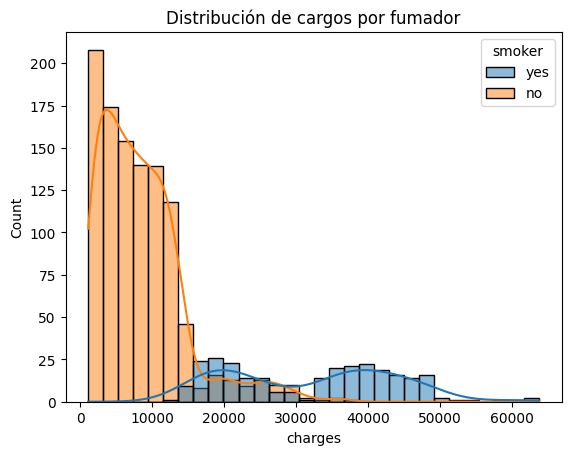

In [26]:
sns.histplot(data=df, x='charges', hue='smoker', kde=True)
plt.title('Distribución de cargos por fumador')
plt.show()

### 7.1 Interpretación del histograma: Distribución de cargos por hábito de fumar

➡️ **No fumadores:**  
La distribución de los cargos médicos para los no fumadores presenta un pico pronunciado en los rangos bajos de gasto, lo que indica que la mayoría de este grupo incurre en costos relativamente reducidos. No obstante, se observa una cola larga hacia la derecha, lo que evidencia la presencia de casos atípicos con gastos elevados. Estos valores extremos sugieren la existencia de subgrupos de mayor costo, cuya naturaleza podría explorarse en análisis posteriores.

➡️ **Fumadores:**  
En contraste, la distribución de los fumadores se encuentra claramente desplazada hacia valores más altos de gasto, con una mayor concentración de observaciones en rangos intermedios y altos. Aunque el pico es menos pronunciado —posiblemente debido al menor tamaño de este grupo—, la ausencia de una concentración significativa en rangos bajos refuerza la fuerte asociación entre el hábito de fumar y mayores costos del seguro médico.


--------------------------------

### 8. Boxplot Comparativo entre condicion de fumador y Gastos medicos.

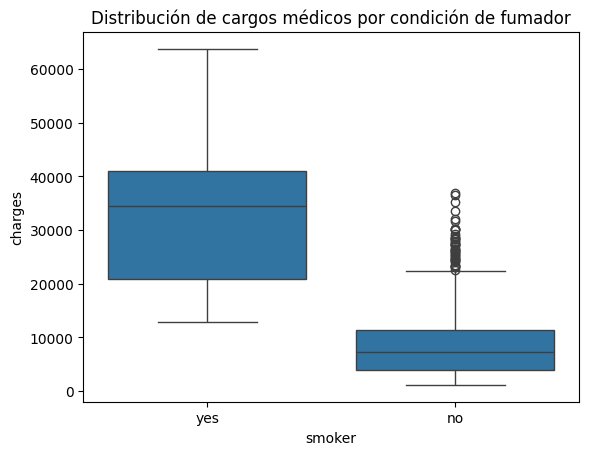

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\MARIO\PORTAFOLIO\Insurance\Insurance.csv", sep=',')
plt.figure()
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Distribución de cargos médicos por condición de fumador')
plt.show()


### 8.1 Interpretacion del Box plot
➡️ El boxplot de los cargos médicos por condición de fumador muestra diferencias sustanciales entre ambos grupos. Los fumadores presentan una mediana significativamente más alta, así como una mayor dispersión en los costos, lo que evidencia una mayor heterogeneidad y menor previsibilidad en los gastos médicos.

➡️ En contraste, los no fumadores concentran la mayor parte de sus cargos en rangos bajos, con una variabilidad más limitada. Aunque se observan valores atípicos de alto costo en este grupo, estos representan casos excepcionales. En conjunto, el gráfico refuerza la fuerte asociación entre el hábito de fumar y mayores costos médicos.


------------------------

### 9. Relación entre la edad y los cargos médicos
existe una relacion entre la edad del asegurado y los gastos medicos?


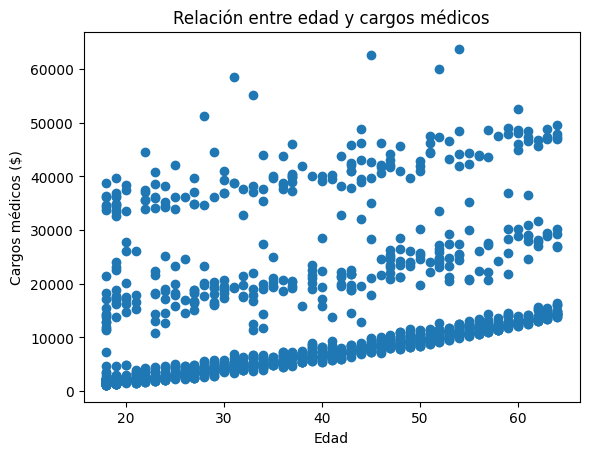

In [8]:
plt.scatter(df['age'], df['charges'])
plt.xlabel('Edad')
plt.ylabel('Cargos médicos ($)')
plt.title('Relación entre edad y cargos médicos')
plt.show()

### 9.1 Interpretacion Scatter plot

El gráfico de dispersión muestra una relación positiva entre la edad y los cargos médicos. En general, a medida que aumenta la edad, los costos del seguro tienden a incrementarse, especialmente a partir de los 40 años.

Sin embargo, se observa una alta dispersión de los cargos para una misma edad, lo que indica que la edad por sí sola no explica completamente el costo del seguro médico.

Adicionalmente, se identifican dos bandas diferenciadas de gasto: una con cargos bajos a moderados y otra con cargos significativamente más altos. Esta separación sugiere la influencia de otras variables relevantes, como el hábito de fumar, que amplifican los costos médicos independientemente de la edad.


------------------------------------------

### 10. Relación entre edad, hábito de fumar y cargos médicos



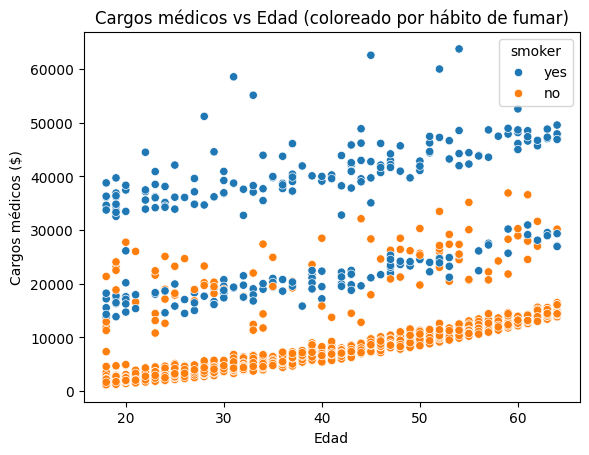

In [9]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Cargos médicos vs Edad (coloreado por hábito de fumar)')
plt.xlabel('Edad')
plt.ylabel('Cargos médicos ($)')
plt.show()

### 10.1 Interpretacion Scatter Plot coloreado.

Al segmentar la relación entre edad y cargos médicos por condición de fumador, se observa una clara separación entre ambos grupos. Para prácticamente todas las edades, los fumadores presentan cargos significativamente más altos que los no fumadores.

En ambos grupos existe una tendencia creciente de los costos con la edad; sin embargo, esta relación es más pronunciada y presenta mayor variabilidad en el caso de los fumadores. Esto sugiere que el hábito de fumar no solo incrementa los costos médicos de forma directa, sino que además amplifica el efecto de la edad sobre dichos costos.

Estos resultados confirman que el tabaquismo es uno de los factores más determinantes en el aumento del costo del seguro médico.


--------------------------------

### 11. Relacion BMI Vs charges (indice de masa corporal Vs cargos)

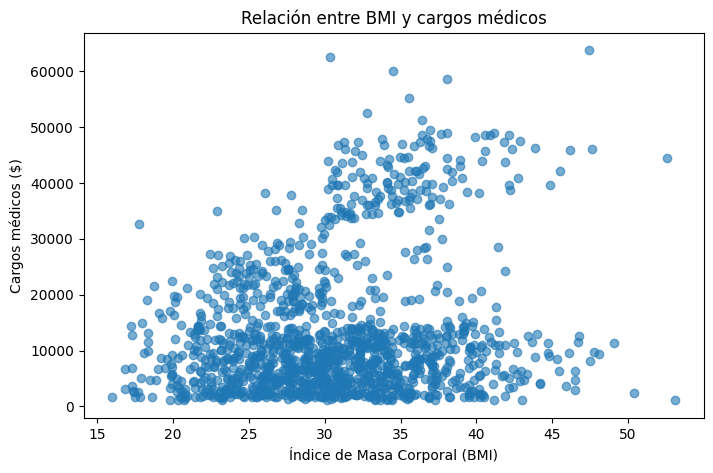

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(df['bmi'], df['charges'], alpha=0.6)
plt.xlabel('Índice de Masa Corporal (BMI)')
plt.ylabel('Cargos médicos ($)')
plt.title('Relación entre BMI y cargos médicos')
plt.show()

### 11.1 Interpretacion Scatter plot

El gráfico de dispersión no muestra una relación lineal clara entre el índice de masa corporal (BMI) y los cargos médicos. Para un amplio rango de valores de BMI (aproximadamente entre 20 y 40), se observan cargos que van desde valores bajos hasta costos muy elevados.

Si bien el BMI por sí solo no parece ser un predictor fuerte del costo del seguro médico, se aprecia que a valores más altos de BMI aumenta la dispersión de los cargos, lo que sugiere una mayor probabilidad de incurrir en costos elevados. Esto indica que el efecto del BMI podría depender de la interacción con otras variables, como el hábito de fumar.


------------------------------

### 12. Relacion entre BMI, habito de fumar y cargos medicos

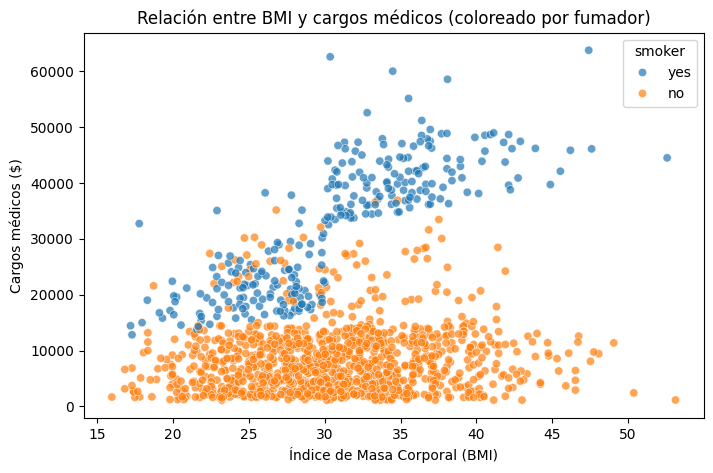

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.7)
plt.title('Relación entre BMI y cargos médicos (coloreado por fumador)')
plt.xlabel('Índice de Masa Corporal (BMI)')
plt.ylabel('Cargos médicos ($)')
plt.show()

### 12.1 Interpretacion Scatter plot coloreado
➡️ **No fumadores (naranja):**
No muestran una relación clara entre BMI y cargos. Los puntos están dispersos, sugiriendo que el peso corporal no es un factor determinante para el costo del seguro en este grupo.

➡️ **Fumadores (azul):**
Muestran una tendencia moderada ascendente: a medida que aumenta el BMI, los cargos tienden a incrementarse. Esto indica que en los fumadores, la combinación de tabaquismo y sobrepeso/obesidad tiene un efecto acumulativo en los costos médicos.

------------------------

### 13. Correlacion entre BMI y Charges

In [12]:
# Correlación para no fumadores
r_no = df[df['smoker'] == 'no']['charges'].corr(df[df['smoker'] == 'no']['bmi'])

# Correlación para fumadores
r_yes = df[df['smoker'] == 'yes']['charges'].corr(df[df['smoker'] == 'yes']['bmi'])

print(f"Correlación (no fumadores): {r_no:.3f}")
print(f"Correlación (fumadores):   {r_yes:.3f}")

Correlación (no fumadores): 0.084
Correlación (fumadores):   0.806


In [14]:
# Ver tipos de las columnas clave
print(df[['bmi', 'charges', 'smoker']].dtypes)

# Ver estadísticas de fumadores
print("\nEstadísticas para fumadores:")
print(df[df['smoker'] == 'yes'][['bmi', 'charges']].describe())

bmi        float64
charges    float64
smoker      object
dtype: object

Estadísticas para fumadores:
              bmi       charges
count  274.000000    274.000000
mean    30.708449  32050.231832
std      6.318644  11541.547176
min     17.195000  12829.455100
25%     26.083750  20826.244213
50%     30.447500  34456.348450
75%     35.200000  41019.207275
max     52.580000  63770.428010


### 13.1 Interpretacion de correlacion entre BMI y Charges

El análisis de correlación, validado con tipos de datos y estadísticas descriptivas, revela un patrón extremo en el grupo de fumadores:

- **No fumadores**: correlación ≈ **0.08** → **ninguna relación lineal** entre BMI y costos.
- **Fumadores**: correlación ≈ **0.81** → **relación lineal muy fuerte**, la más alta observada en este análisis.

Las estadísticas confirman que los valores de BMI (17.2–52.6) y cargos ($12,829–$63,770) son realistas y no hay errores de formato. Por lo tanto, esta alta correlación refleja una **asociación genuina en los datos**: en este dataset, **el aumento del BMI entre fumadores está directamente ligado a un incremento proporcional en los gastos médicos**.

**Implicación práctica**: La combinación de tabaquismo y sobrepeso/obesidad no solo suma riesgos, sino que **los multiplica**, generando un perfil de cliente con costos predeciblemente altos.

### 13.2 Visualizacion de la tendencia en la relacion BMI y cargos para fumadores

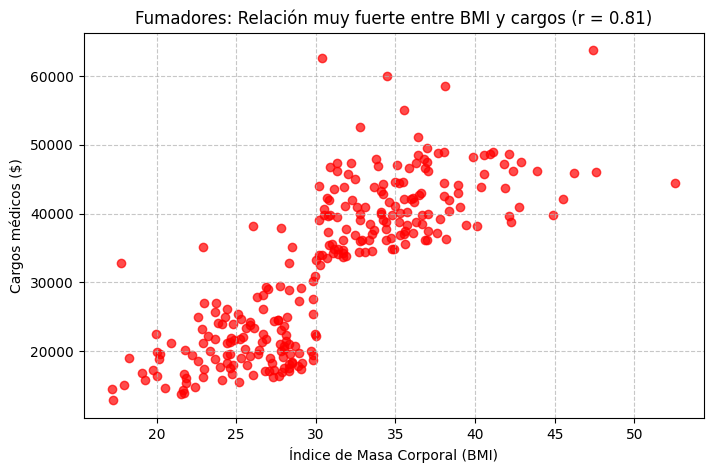

In [15]:
# Filtrar solo fumadores
fumadores = df[df['smoker'] == 'yes']

# Gráfico
plt.figure(figsize=(8, 5))
plt.scatter(fumadores['bmi'], fumadores['charges'], color='red', alpha=0.7)
plt.title('Fumadores: Relación muy fuerte entre BMI y cargos (r = 0.81)')
plt.xlabel('Índice de Masa Corporal (BMI)')
plt.ylabel('Cargos médicos ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Este scatter plot muestra la relación entre el Índice de Masa Corporal (BMI) y los cargos médicos para el grupo de **fumadores**. La tendencia ascendente es evidente: a medida que aumenta el BMI, los cargos tienden a incrementarse de forma lineal y consistente.

La correlación de 0.81 indica una relación fuertemente positiva entre el BMI y los cargos médicos en fumadores. Este patrón, confirmado visualmente, sugiere que el aumento del peso corporal está estrechamente asociado con mayores costos del seguro médico en este grupo.

**Conclusión**:  
 Este es uno de los hallazgos más relevantes del análisis exploratorio. Sugiere que las aseguradoras podrían usar esta combinación (tabaquismo + BMI) como un **indicador de riesgo extremo**, con implicaciones directas en las tarifas de pólizas.

--------------------------

### 14. Correlacion entre edad (age) y cargos (charges)

In [16]:
r_edad_total = df['age'].corr(df['charges'])
print(f"Correlación general (edad vs cargos): {r_edad_total:.3f}")

Correlación general (edad vs cargos): 0.299


### 14.1 Correlacion edad y condicion de fumador

In [17]:
r_edad_no = df[df['smoker'] == 'no']['age'].corr(df[df['smoker'] == 'no']['charges'])
r_edad_yes = df[df['smoker'] == 'yes']['age'].corr(df[df['smoker'] == 'yes']['charges'])

print(f"Correlación (no fumadores): {r_edad_no:.3f}")
print(f"Correlación (fumadores):   {r_edad_yes:.3f}")

Correlación (no fumadores): 0.628
Correlación (fumadores):   0.368


### 14.2 Scatter plot edad Vs cargo, coloreado por fumador

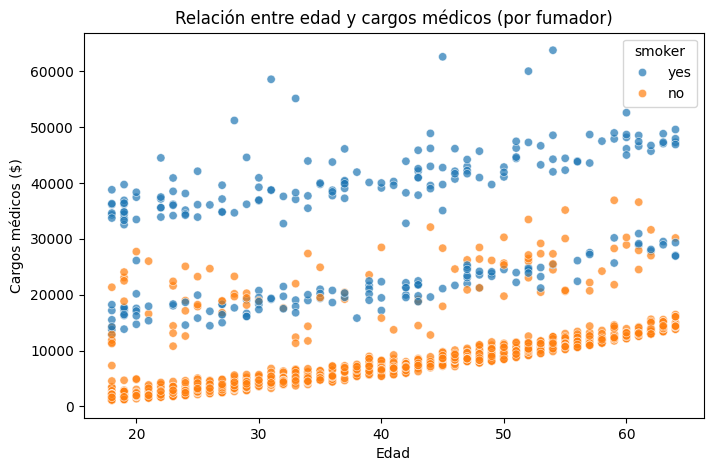

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', alpha=0.7)
plt.title('Relación entre edad y cargos médicos (por fumador)')
plt.xlabel('Edad')
plt.ylabel('Cargos médicos ($)')
plt.show()

### 14.3 Interpretacion de Resultados
### Correlación entre edad y cargos médicos por grupo

El análisis revela que la relación entre edad y costos varía significativamente según el hábito de fumar:

- **No fumadores**: correlación ≈ **0.63** → **relación fuerte y positiva**. A mayor edad, mayores cargos. Esto sugiere que, en ausencia de otros factores de riesgo (como fumar), **la edad es el principal driver de los costos médicos** en este grupo.

- **Fumadores**: correlación ≈ **0.37** → relación **moderada**. El efecto del tabaquismo "domina" sobre la edad, lo que reduce la influencia de esta última en los gastos.

**Conclusión clave**:  
- Para **no fumadores**, la edad es un predictor confiable de costos.  
- Para **fumadores**, el hábito de fumar tiene un impacto tan fuerte que **diluye el efecto de la edad**.  
- En conjunto, estos hallazgos refuerzan la idea de que **los factores de riesgo interactúan**, y no deben analizarse de forma aislada.

### **Conclusiones del Análisis Exploratorio**

**Resumen de los hallazgos clave**

El análisis confirma que el hábito de fumar es el factor más influyente en los costos del seguro médico, con fumadores pagando, en promedio, casi cuatro veces más que los no fumadores. Además, se identificaron interacciones relevantes entre las variables analizadas:

**En fumadores**, el índice de masa corporal (BMI) presenta una asociación lineal muy fuerte con los cargos médicos (r = 0.81), lo que indica que el sobrepeso u obesidad están estrechamente relacionados con mayores costos cuando se combinan con el tabaquismo.

**En no fumadores**, la edad emerge como el principal predictor de los costos (r = 0.63), mostrando un aumento progresivo y relativamente predecible de los gastos a medida que avanza la edad.

Por el contrario, en no fumadores el **BMI** muestra una relación positiva con los cargos, pero extremadamente débil (r = 0.08), lo que indica que, aunque la asociación existe, carece de relevancia predictiva práctica cuando se analiza de forma aislada, y la **edad** pierde fuerza explicativa en fumadores (r = 0.37), lo que refuerza la idea de que los factores de riesgo no actúan de forma aislada, sino en combinación.

**Integración de las variables analizadas**

Las variables numéricas (age, bmi, children, charges) y categóricas (smoker, sex, region) fueron exploradas de manera conjunta. Mientras que children, sex y region mostraron una influencia limitada sobre los costos, la interacción entre smoker, age y bmi reveló perfiles de riesgo claramente diferenciados:

Perfil de alto riesgo: fumadores con BMI elevado, independientemente de la edad.

Perfil de riesgo progresivo: no fumadores, en los que los costos aumentan de forma gradual con la edad.

Respuesta a las preguntas del análisis

¿Qué factores están asociados a mayores costos del seguro médico?
El tabaquismo es el factor más influyente. Adicionalmente, un BMI elevado en fumadores y una mayor edad en no fumadores se asocian con cargos significativamente más altos.

¿Cómo difieren los cargos entre fumadores y no fumadores?
Los fumadores presentan cargos más elevados, con mayor dispersión y menor previsibilidad, mientras que los no fumadores se concentran mayoritariamente en rangos bajos de gasto, con pocos casos extremos.

¿Existe una relación entre la edad y el costo del seguro?
Sí, pero esta relación es fuerte principalmente en no fumadores. En fumadores, el impacto dominante del tabaquismo atenúa la influencia de la edad sobre los costos.

¿Cómo influye el BMI en los cargos médicos?
El BMI no muestra un efecto relevante de forma aislada; sin embargo, en fumadores existe una asociación fuerte y positiva entre BMI y costos médicos.

¿Existen interacciones que amplifiquen los costos?
Sí. La combinación de tabaquismo y BMI elevado se asocia con cargos médicos significativamente más altos, configurando un perfil de riesgo particularmente elevado.

Implicaciones para la toma de decisiones

Desde la perspectiva de las aseguradoras, los resultados sugieren que la tarificación del seguro médico debería considerar interacciones entre factores de riesgo, y no únicamente variables individuales. Un fumador con sobrepeso representa un riesgo sustancialmente mayor que la suma de ambos factores analizados por separado.

Para los asegurados, dejar de fumar no solo reduce los costos inmediatos, sino que modifica la estructura del riesgo: en ausencia del tabaquismo, la edad se convierte en el principal determinante de los costos, un factor más gradual y predecible.

Finalmente, estos hallazgos respaldan el desarrollo de modelos predictivos que incorporen términos de interacción (por ejemplo, smoker × bmi), lo que podría mejorar de forma significativa la precisión en la estimación de primas.

En síntesis, los costos del seguro médico no se explican por una sola variable, sino por perfiles de riesgo compuestos. Comprender estas interacciones resulta clave para una gestión del riesgo más eficiente, justa y personalizada.